Прочитайте базу ```DUQ_hourly.csv(в2)```, сделайте описание особенностей этой выборки, сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам или др., проверьте на стационарность. Сделайте вывод о том, как изменилось поведение ряда на недельных и месячных графиках по сравнению с дневными или наоборот, какие ряды наиболее информативные?

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

import itertools

import warnings
warnings.simplefilter('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])
data.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


In [ ]:
data.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


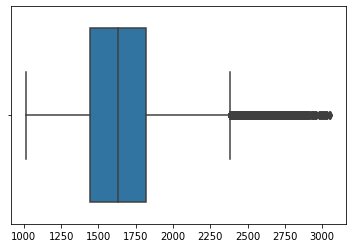

In [ ]:
sns.boxplot(data.values)
#необходимо помнить, что в случае временного ряда это не совсем корректное исследование, 
#т.к. существование цикличности и тренда приводят к существенному изменению значений ряда во времен

In [ ]:
# проверим пропуски
data['DUQ_MW'].isnull().any()

False

Text(0, 0.5, 'МВт')

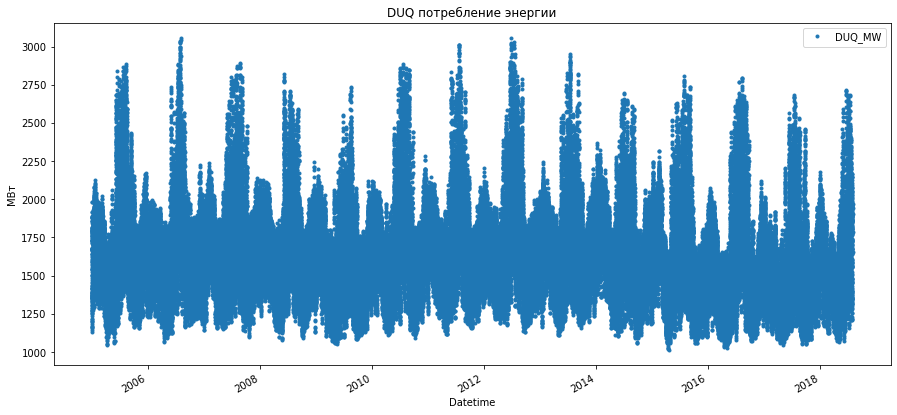

In [ ]:
# посмотрим на графике
data.plot( style = '.', figsize = ( 15, 7 ), title = 'DUQ потребление энергии' )
plt.ylabel ( 'МВт' )

Основные статистики показали, что пропусков нет Визуальный анализ показывает что: Предъявленные данные имеют циклы В целом не наблюдается каких-либо аномалий и необычных скачков

In [ ]:
data['date'] = data.index
data['date'].describe()

count                  119068
unique                 119064
top       2017-11-05 02:00:00
freq                        2
first     2005-01-01 01:00:00
last      2018-08-03 00:00:00
Name: date, dtype: object

делаем resample по **месяцам**

In [ ]:
data_M_mean = data.resample("M").mean()
data_M_mean

,DUQ_MW
Datetime,
2005-01-31,1685.872140
2005-02-28,1656.662202
2005-03-31,1633.283602
2005-04-30,1443.560501
2005-05-31,1487.625000
...,...
2018-04-30,1400.423611
2018-05-31,1567.365591
2018-06-30,1671.675000


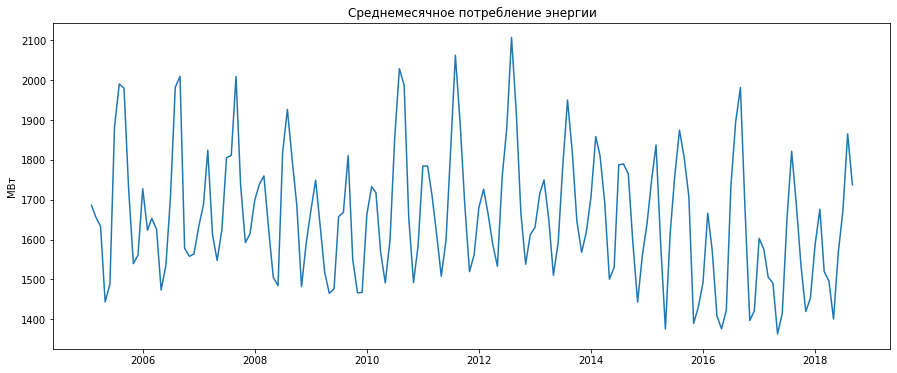

In [ ]:
plt.figure(figsize =(15, 6))
plt.plot( data_M_mean.index, data_M_mean['DUQ_MW'].values)
plt.title('Cреднемесячное потребление энергии')
plt.ylabel ('МВт');

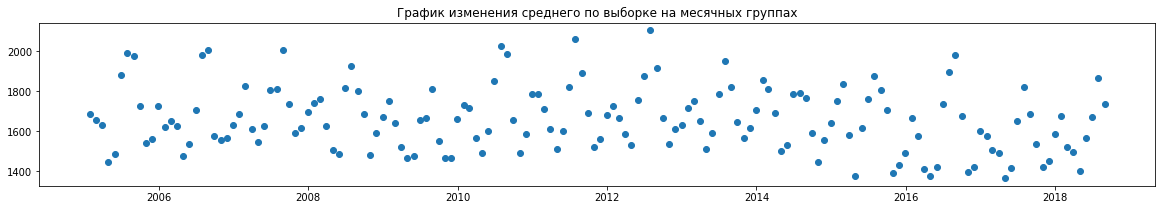

In [ ]:
plt.figure(figsize=(20,3))
plt.title('График изменения среднего по выборке на месячных группах')
plt.plot(data_M_mean,'o')

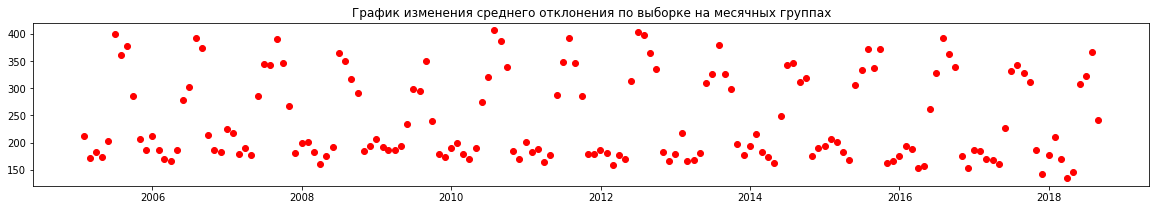

In [ ]:
data_M_std = data.resample("M").std()
plt.figure(figsize=(20,3))
plt.title('График изменения среднего отклонения по выборке на месячных группах')
plt.plot(data_M_std,'o',color='red')

Стационарный

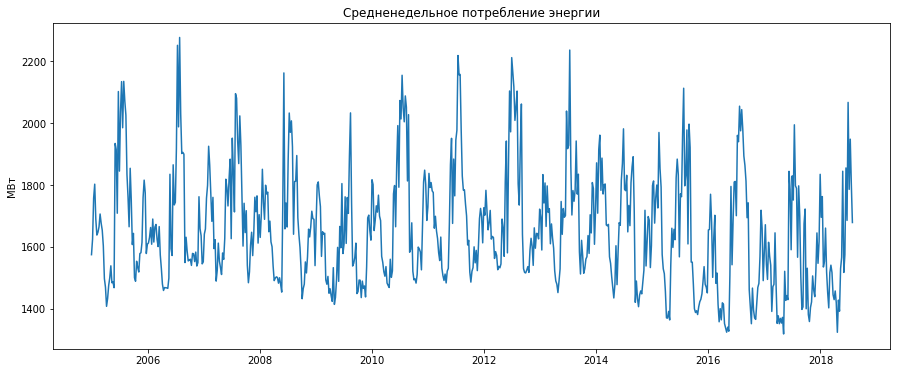

In [ ]:
data_W_mean = data.resample("7D").mean()
plt.figure(figsize =(15, 6))
plt.plot( data_W_mean.index, data_W_mean['DUQ_MW'].values)
plt.title('Cредненедельное потребление энергии')
plt.ylabel ('МВт');

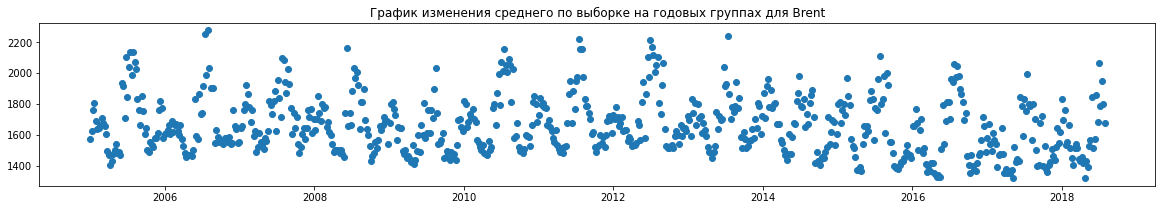

In [ ]:
plt.figure(figsize=(20,3))
plt.title('График изменения среднего по выборке на недельных группах')
plt.plot(data_W_mean,'o')

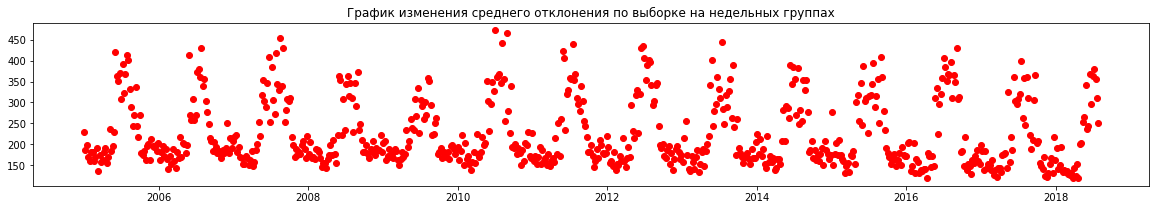

In [ ]:
data_W_std = data.resample("7D").std()
plt.figure(figsize=(20,3))
plt.title('График изменения среднего отклонения по выборке на недельных группах')
plt.plot(data_W_std,'o',color='red')

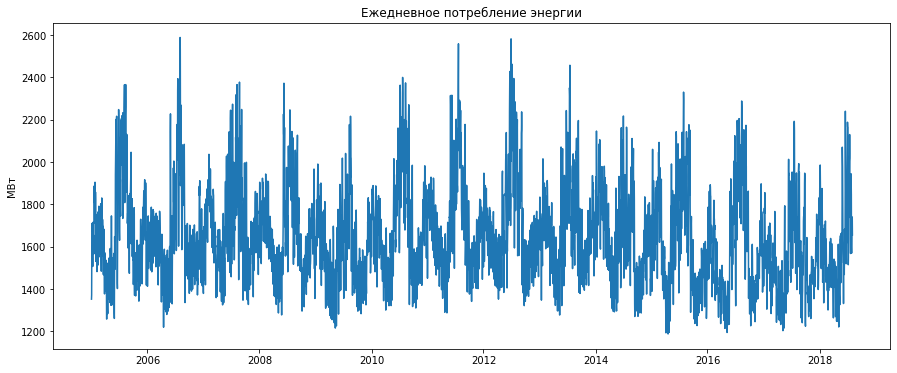

In [ ]:
data_D_mean = data.resample("1D").mean()
plt.figure(figsize =(15, 6))
plt.plot( data_D_mean.index, data_D_mean['DUQ_MW'].values)
plt.title('Ежедневное потребление энергии')
plt.ylabel ('МВт');

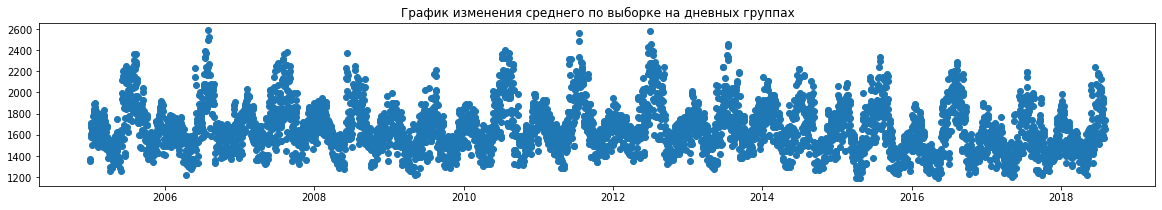

In [ ]:
plt.figure(figsize=(20,3))
plt.title('График изменения среднего по выборке на дневных группах')
plt.plot(data_D_mean,'o')

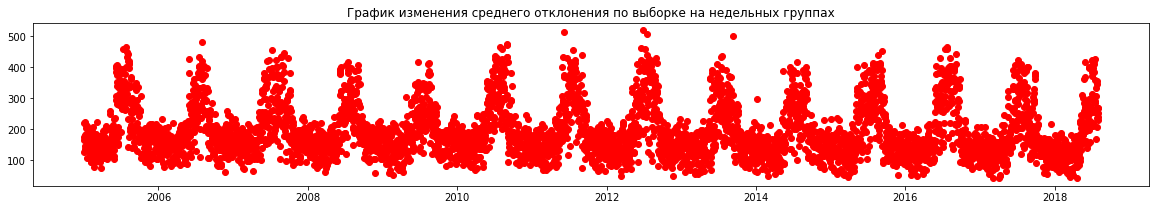

In [ ]:
data_D_std = data.resample("1D").std()
plt.figure(figsize=(20,3))
plt.title('График изменения среднего отклонения по выборке на недельных группах')
plt.plot(data_D_std,'o',color='red')

**среднее по выборке**: Чем лучше детализация (меньше временной диапазон), тем сильнее наблюдается разброс в измерениях. Более укрупненный временной диапазон сглаживает эти моменты

**среднее отклонение по выборке**: чем лучше детализация, тем меньший разброс по среднеквадратичному отклонению по выборке